# Classifier Training

In [25]:
import multiprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score


df = pd.read_csv('Processed_Reviews.csv')
#print(df.head(10))

df = df.drop(['DOC_ID'], axis=1)
#df = df.drop(['PRODUCT_TITLE'], axis=1)
df = df.drop(['REVIEW_TITLE'], axis=1)
df = df.drop(['REVIEW_TEXT'], axis=1)
df = df.drop(['PRODUCT_CATEGORY'], axis=1)
df = df.drop(['PRODUCT_ID'], axis=1)
df["VERIFIED_PURCHASE"].replace({"Y": 1, "N": 0}, inplace=True)
#df = df.drop(['VERIFIED_PURCHASE'], axis=1)

df = df.sample(frac = 1)

le = LabelEncoder()
df['EncodedTitle'] = le.fit_transform(df['PRODUCT_TITLE'])
df = df.drop(['PRODUCT_TITLE'], axis=1)

print(df.head())

X=df.drop(['LABEL'],axis=1)
df['LABEL'].replace({"__label1__": 0, "__label2__": 1}, inplace=True)
y=df['LABEL']

#print(y.head())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
#print(X_test.head())
    
y_pred = classifier.predict(X_test)
#print(y_pred[:10])

#print(X_test[X_test['VERIFIED_PURCHASE']==0].count())

print("MULTINOMIAL NAIVE BAYES")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


            LABEL  RATING  VERIFIED_PURCHASE  SENTIMENT  EncodedTitle
6239   __label1__       5                  1          0         16694
16871  __label2__       5                  0          0         10625
17241  __label2__       5                  1          1          7274
3936   __label1__       2                  0          1          8190
6355   __label1__       5                  0          0         10154
MULTINOMIAL NAIVE BAYES
[[1116  393]
 [ 257 1384]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1509
           1       0.78      0.84      0.81      1641

    accuracy                           0.79      3150
   macro avg       0.80      0.79      0.79      3150
weighted avg       0.80      0.79      0.79      3150

0.7936507936507936


# Saving Classifier

In [26]:
import pickle

filename = 'Trained_Classifier_model.sav'
pickle.dump(classifier, open(filename, "wb"))

# ROC

In [28]:
import sklearn.metrics as metrics

preds = y_pred
fpr,tpr,threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)

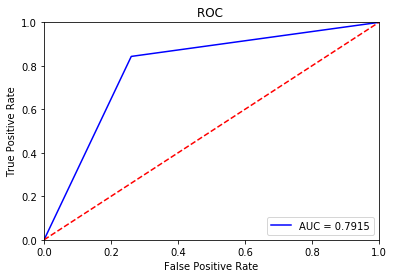

In [30]:
import matplotlib.pyplot as plt

plt.title("ROC ")
plt.plot(fpr,tpr, 'b', label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()